In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
dataset = pd.read_excel("C:/Users/DELL/OneDrive/Desktop/ML/training_mathbert.xlsx")

# Feature columns and label
features = dataset.iloc[:, :-1]  # All columns except the last one are features
target = dataset['output']       # The last column is the target label

# Split the dataset into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path = "C:/Users/DELL/OneDrive/Desktop/ML/training_mathbert.xlsx"
data = pd.read_excel(file_path)

# Define feature columns and target
feature_data = data.drop(columns=['output'])
target_data = data['output']

# Convert the target variable to binary based on the threshold of 4
binary_target = np.where(target_data > 4, 1, 0)

# Split the dataset into training and test sets
features_train, features_test, target_train, target_test = train_test_split(feature_data, binary_target, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Train a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(features_train, target_train)

# Predict on the training and test sets
train_predictions = knn_classifier.predict(features_train)
test_predictions = knn_classifier.predict(features_test)

# Evaluate the model
train_conf_matrix = confusion_matrix(target_train, train_predictions)
test_conf_matrix = confusion_matrix(target_test, test_predictions)

print("Training Confusion Matrix:\n", train_conf_matrix)
print("\nTest Confusion Matrix:\n", test_conf_matrix)

# Calculate and print other performance metrics
train_class_report = classification_report(target_train, train_predictions)
test_class_report = classification_report(target_test, test_predictions)

print("\nTraining Classification Report:\n", train_class_report)
print("\nTest Classification Report:\n", test_class_report)


Training Confusion Matrix:
 [[552  42]
 [ 77 117]]

Test Confusion Matrix:
 [[236  32]
 [ 34  36]]

Training Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       594
           1       0.74      0.60      0.66       194

    accuracy                           0.85       788
   macro avg       0.81      0.77      0.78       788
weighted avg       0.84      0.85      0.84       788


Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       268
           1       0.53      0.51      0.52        70

    accuracy                           0.80       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.80      0.80      0.80       338



In [5]:
#2q)

import numpy as np
import pandas as pd


df_purchase = pd.read_excel("C:/Users/DELL/OneDrive/Desktop/ML/training_mathbert.xlsx", sheet_name=0, usecols='A:E')
A = df_purchase.iloc[:, 1:4]
C = df_purchase.iloc[:, 4]

print("Dimensionality of the vector space:", df_purchase.shape)
print("Number of vectors:", df_purchase.shape[0])
print("Rank of matrix A:", np.linalg.matrix_rank(A))

A_inv = np.linalg.pinv(A)
price_of_each_item = (A_inv @ C)
print("Price of each item:", price_of_each_item)

# Calculate MSE, RMSE, MAPE and R2 scores for the price prediction
y = C
y_pred = A @ price_of_each_item
MSE = np.square(np.subtract(y,y_pred)).mean()
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100
R2 = 1 - (np.square(y - y_pred).sum() / np.square(y - y.mean()).sum())

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAPE:", MAPE)
print("R2:", R2)


Dimensionality of the vector space: (1126, 5)
Number of vectors: 1126
Rank of matrix A: 3
Price of each item: [-0.51446426 -0.65659168 -1.19064923]
MSE: 0.0944957331863228
RMSE: 0.307401582927484
MAPE: 63.84935978574929
R2: -1.6437567559215447


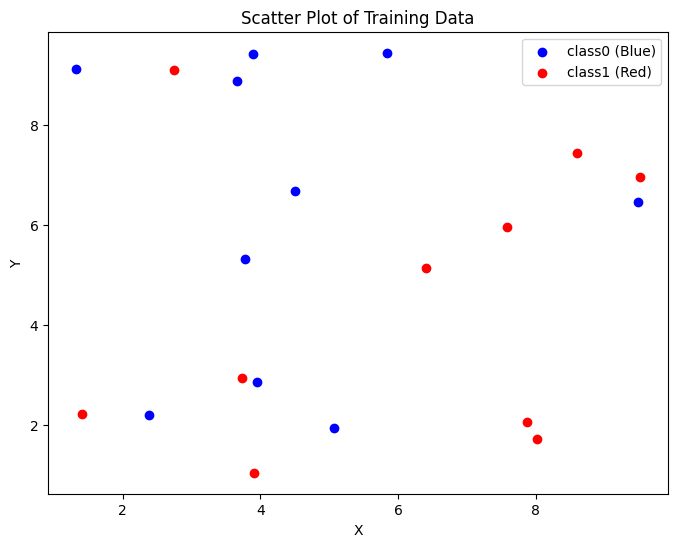

           X         Y   Class
0   3.906325  1.052062  class1
1   3.891974  9.399546  class0
2   9.478269  6.455137  class0
3   1.418029  2.218742  class1
4   7.868790  2.060709  class1
5   6.411097  5.139947  class1
6   7.584353  5.958421  class1
7   5.840002  9.434607  class0
8   3.771322  5.325454  class0
9   3.665416  8.862918  class0
10  2.388580  2.199123  class0
11  3.958283  2.858693  class0
12  8.597920  7.432743  class1
13  9.513524  6.957112  class1
14  1.329114  9.115177  class0
15  3.740784  2.946055  class1
16  5.064430  1.940988  class0
17  2.740736  9.084544  class1
18  4.508786  6.667352  class0
19  8.022210  1.730459  class1


In [6]:
#3q)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 20 random data points for X and Y, with values ranging between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign these points to two different classes randomly
classes = np.random.choice(['class0', 'class1'], size=20)

# Create a DataFrame with X, Y, and Class columns
df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Separate the points based on their class
X_class0 = df[df['Class'] == 'class0']['X']
Y_class0 = df[df['Class'] == 'class0']['Y']
X_class1 = df[df['Class'] == 'class1']['X']
Y_class1 = df[df['Class'] == 'class1']['Y']

# Create a scatter plot of the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_class0, Y_class0, c='blue', label='class0 (Blue)')
plt.scatter(X_class1, Y_class1, c='red', label='class1 (Red)')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')

plt.legend(loc='best')

plt.show()

# Display the DataFrame
print(df)


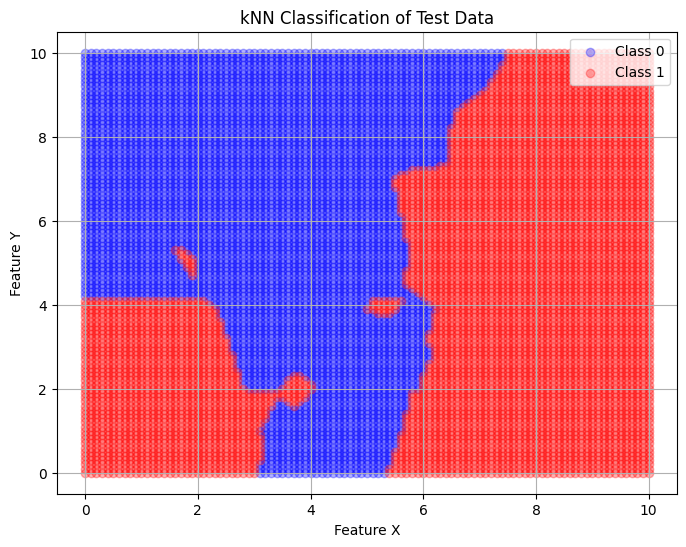

In [7]:
#4q)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['X', 'Y']], df['Class'])

# Classify the test data
test_data['Class'] = knn.predict(test_data[['X', 'Y']])

plt.figure(figsize=(8, 6))
plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)

plt.show()


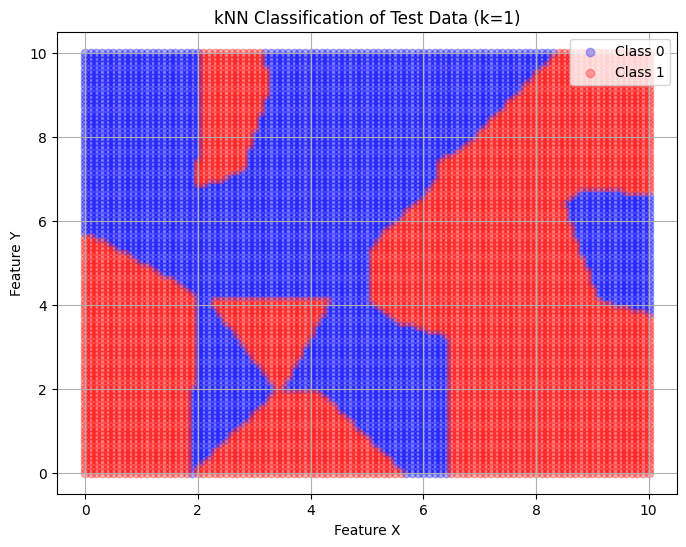

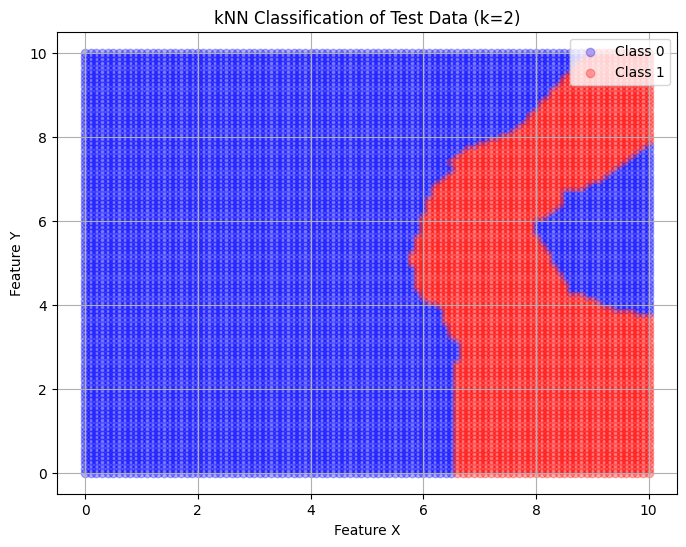

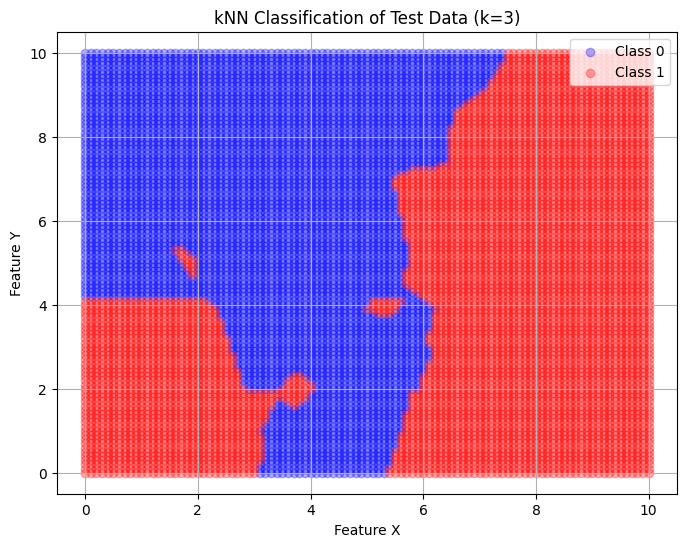

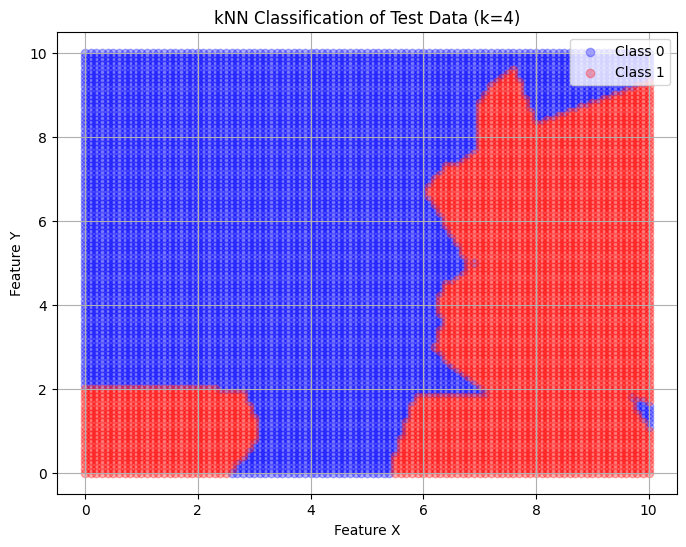

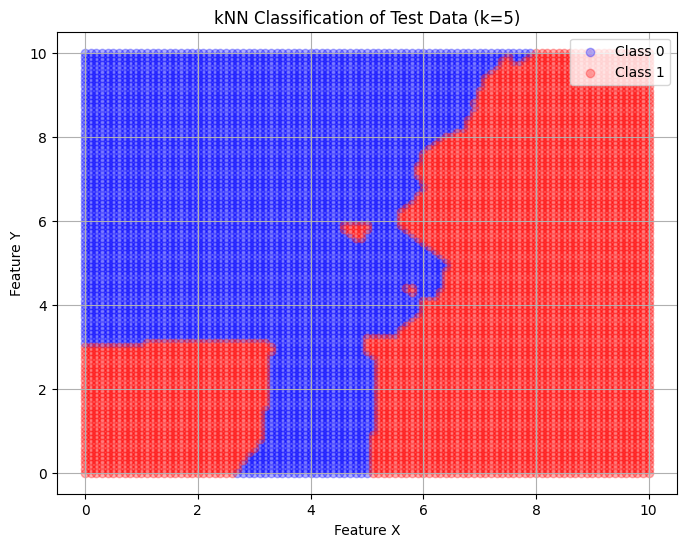

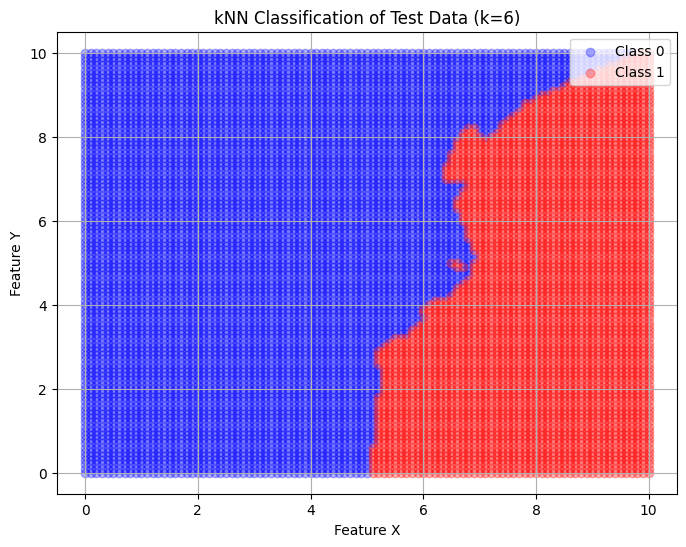

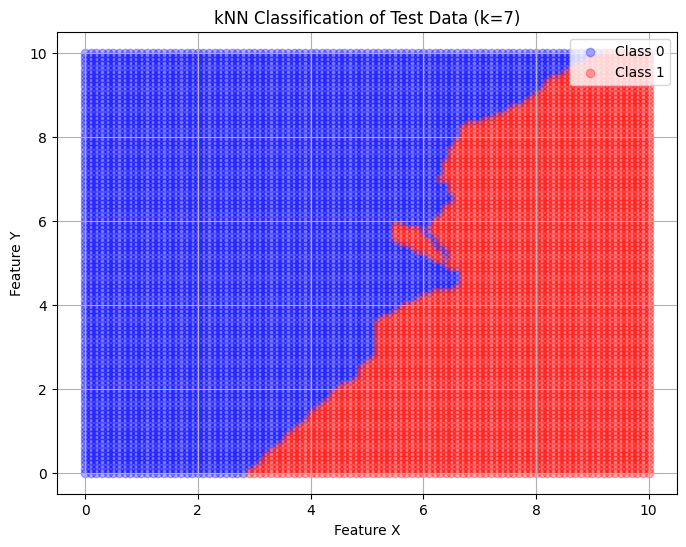

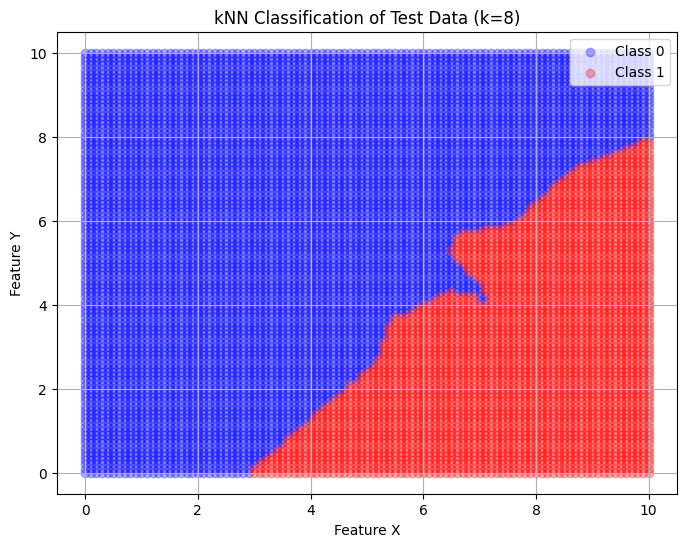

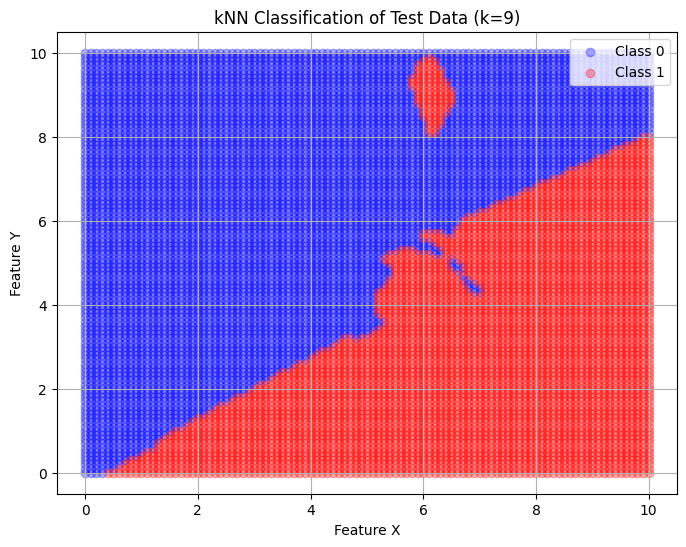

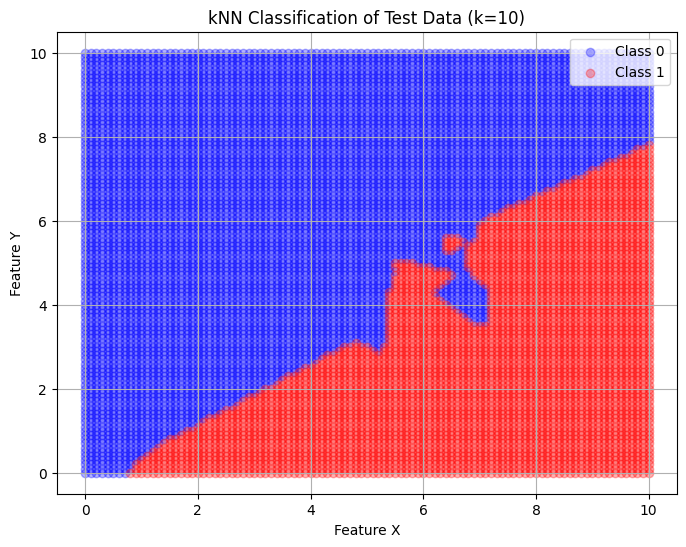

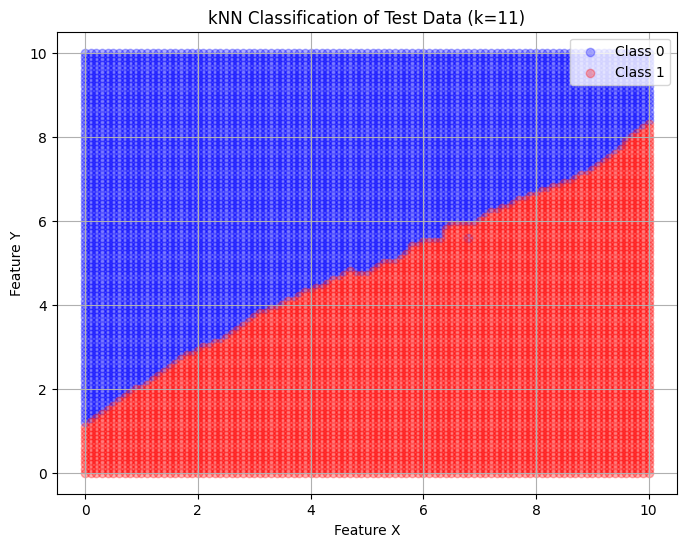

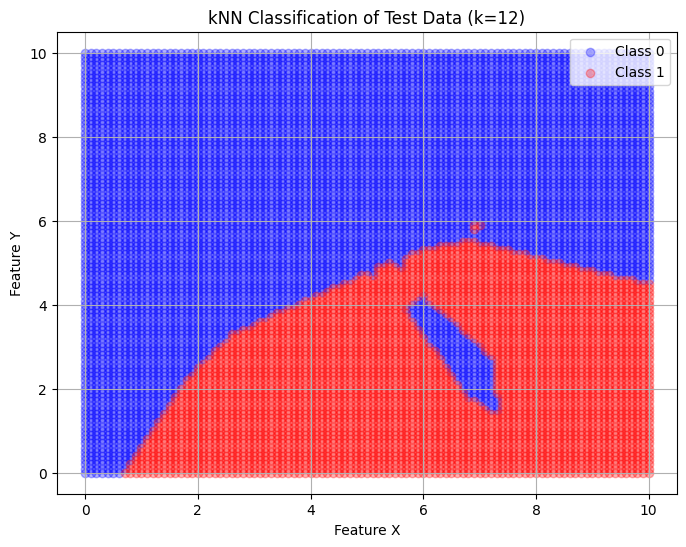

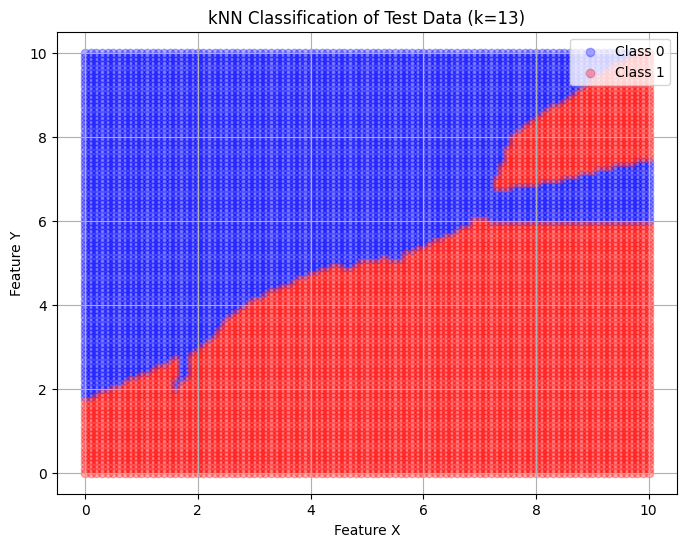

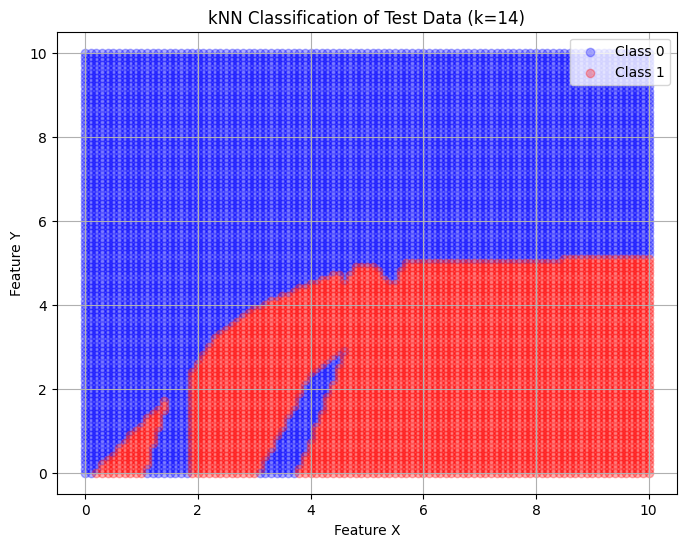

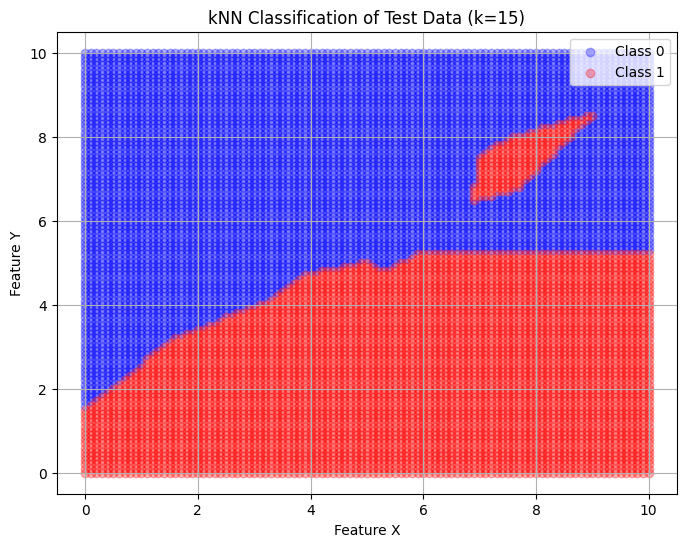

In [9]:
#5q)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['X', 'Y']], df['Class'])

    test_data['Class'] = knn.predict(test_data[['X', 'Y']])

    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)

    plt.show()


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best k value: 4
Best cross-validation accuracy: 0.5000


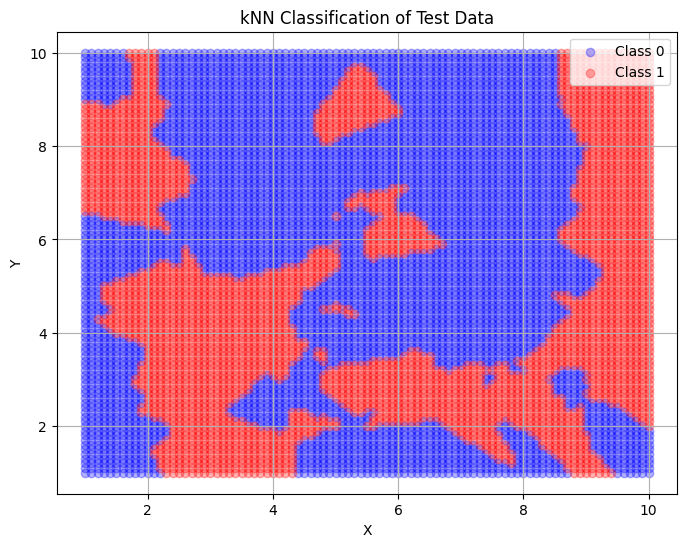

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Generate synthetic data similar to Code 2
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 100)
Y = np.random.uniform(1, 10, 100)
classes = np.random.choice(['class0', 'class1'], size=100)

# Create DataFrame
df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Convert class labels to binary output (1 for 'class1', 0 for 'class0')
df['output'] = df['Class'].apply(lambda x: 1 if x == 'class1' else 0)

# Select features and target
X_features = df[['X', 'Y']]
y_target = df['output']

# Generate test data with values of X & Y varying between 1 and 10 with increments of 0.1
X_test = np.arange(1, 10.1, 0.1)
Y_test = np.arange(1, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({
    'X': X_test.ravel(),
    'Y': Y_test.ravel()
})

# Train the kNN classifier with GridSearchCV
param_grid = {'n_neighbors': range(1, 8)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_features, y_target)

# Output the best k value and the best cross-validation accuracy
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Train the classifier with the best k value
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_features, y_target)

# Classify the test data
test_data['Class'] = knn_best.predict(test_data[['X', 'Y']])

# Plotting the test data output with test points colored as per their predicted class
plt.figure(figsize=(8, 6))
plt.scatter(test_data['X'][test_data['Class'] == 0],
            test_data['Y'][test_data['Class'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['X'][test_data['Class'] == 1],
            test_data['Y'][test_data['Class'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()


Best k value: 4
Best cross-validation accuracy: 0.5000


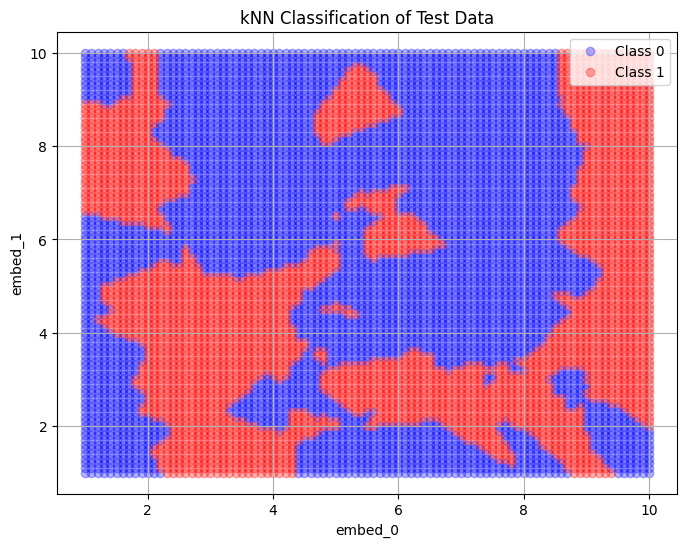

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Generate synthetic data similar to Code 2
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 100)
Y = np.random.uniform(1, 10, 100)
classes = np.random.choice(['class0', 'class1'], size=100)

# Create DataFrame
df = pd.DataFrame({'embed_0': X, 'embed_1': Y, 'Class': classes})

# Convert class labels to binary output (1 for 'class1', 0 for 'class0')
df['output'] = df['Class'].apply(lambda x: 1 if x == 'class1' else 0)

# Select features and target
X_features = df[['embed_0', 'embed_1']]
y_target = df['output']

# Generate test data with values of X & Y varying between 1 and 10 with increments of 0.1
X_test = np.arange(1, 10.1, 0.1)
Y_test = np.arange(1, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({
    'embed_0': X_test.ravel(),
    'embed_1': Y_test.ravel()
})

# Train the kNN classifier with GridSearchCV
param_grid = {'n_neighbors': range(1, 8)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_features, y_target)

# Output the best k value and the best cross-validation accuracy
print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Train the classifier with the best k value
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_features, y_target)

# Classify the test data
test_data['Class'] = knn_best.predict(test_data[['embed_0', 'embed_1']])

# Plotting the test data output with test points colored as per their predicted class
plt.figure(figsize=(8, 6))
plt.scatter(test_data['embed_0'][test_data['Class'] == 0],
            test_data['embed_1'][test_data['Class'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['embed_0'][test_data['Class'] == 1],
            test_data['embed_1'][test_data['Class'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('embed_0')
plt.ylabel('embed_1')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()

